In [1]:
import os
from PIL import Image
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_dir = r"C:\Users\abjawad\Documents\GitHub\local-attention-model\data"
colored_level = 'ColoredLabel'
depth_level = 'Depth'
hha = 'HHA'
label = 'Label'
rgb = 'RGB'
splits = 'splits.mat'

In [3]:

def read_image_from_id(path, id, img_type, format='jpg'):
    filename = f"{id}.{format}"  # or f"{id}.npy" depending on the image type
    filepath = os.path.join(path, img_type, filename)
    
    if os.path.exists(filepath):
        img = Image.open(filepath)  # or np.load(filepath) if the image type requires it
        return img
    else:
        print(f'File not found: {filepath}')
        return None

def read_npy(path, id, img_type):

    filename = f"{id}.npy"  # Assuming the format of the filename
    filepath = os.path.join(path, filename)
    if os.path.exists(filepath):
        img = np.load(filepath)
        return img
    else:
        print(f'File not found: {filepath}')
        return None



In [4]:


def display_images_for_ids(dataset_dir, ids, img_types=['RGB', 'Depth', 'Label', 'HHA', 'ColoredLabel']):
    # Prepare the figure
    num_ids = len(ids)
    num_types = len(img_types)
    fig, ax = plt.subplots(num_ids, num_types, figsize=(10, 2 * num_ids))

    # If we only have one subplot, ax will be 1D. We need it to always be 2D.
    if ax.ndim == 1:
        ax = ax.reshape(-1, 1)

    # Loop over each id and each image type
    for i, id in enumerate(ids):
        for j, img_type in enumerate(img_types):
            img = None
            if img_type == 'Depth':
                img = np.load(os.path.join(dataset_dir, img_type, f'{id}.npy'))
            
            if img_type == 'RGB':
                img = read_image_from_id(dataset_dir, id, img_type, format='jpg')
                
            elif img_type == 'Label':
                img = read_image_from_id(dataset_dir, id, img_type, format='png')
                
            elif img_type == 'HHA':
                img = read_image_from_id(dataset_dir, id, img_type, format='jpg')
                
            elif img_type == 'ColoredLabel':
                img = read_image_from_id(dataset_dir, id, img_type, format='png')

            if img is not None:
                ax[i, j].imshow(img)
                ax[i, j].set_title(f'{img_type} {id}')
            else:
                ax[i, j].set_title(f'{img_type} {id} (not found)')
                ax[i, j].axis('off')
            
    plt.show()



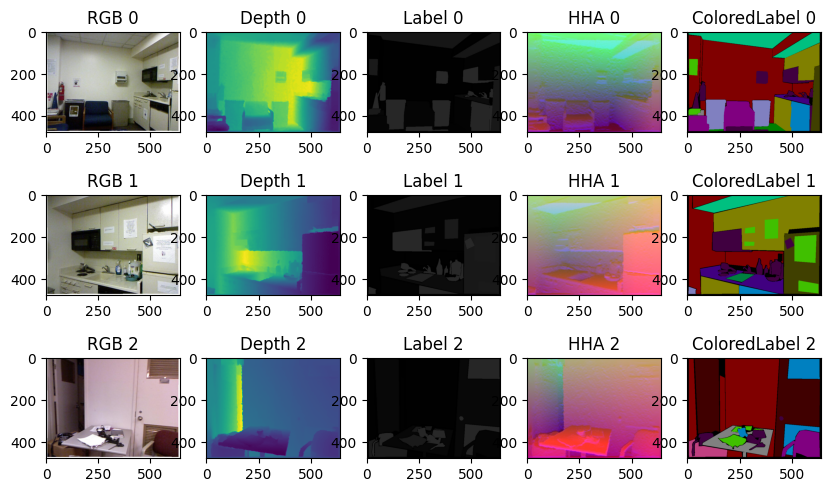

In [5]:
ids = [0,1,2]
display_images_for_ids(dataset_dir, ids, img_types=['RGB', 'Depth', 'Label', 'HHA', 'ColoredLabel'])

(640, 480)


array([ 0,  1,  2,  3,  5,  7, 12, 22, 24, 26, 38, 39, 40], dtype=uint8)

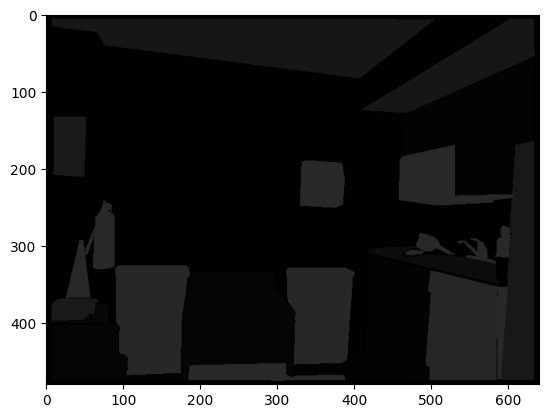

In [10]:
id = 0

img = read_image_from_id(dataset_dir, id, 'Label', format='png')

plt.imshow(img)
print(img.size)

# check distinct values
np.unique(img)